In [24]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import ast
import seaborn as sns
import numpy as np

In [25]:
df = pd.read_csv("franchises_complete_dataframe.csv", index_col = 0)

D:\Programs\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,2,7,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


When considering comparisons of franchise vs non-franchise, it makes sense to get a clear picture of th data first:

In [26]:
df.describe()

,year,is_adult,rating,votes,game_id,best_fit_ratio,franchise_count
count,307282.000000,307375.000000,307375.000000,3.073750e+05,11208.000000,16987.000000,14696.000000
mean,1995.021990,0.014442,6.216443,3.510691e+03,13200.579229,95.353779,25.383165
std,25.332077,0.119303,1.366069,3.556411e+04,7354.456461,6.344027,41.134349
min,1894.000000,0.000000,1.000000,5.000000e+00,1.000000,60.000000,3.000000
25%,1980.000000,0.000000,5.400000,1.800000e+01,6689.000000,90.000000,5.000000
50%,2005.000000,0.000000,6.300000,5.900000e+01,13433.000000,100.000000,10.000000
75%,2015.000000,0.000000,7.100000,2.980000e+02,19815.250000,100.000000,25.000000
max,2023.000000,1.000000,10.000000,2.727553e+06,25581.000000,100.000000,216.000000


In [27]:
df

,franchise_name,franchise_id,tconst,title,year,is_adult,runtime,genres,rating,votes,type,game_id,best_fit_ratio,developers,platforms,publishers,age_rating,franchise_count
0,The Aldrich Family,f0,tt0032123,what a life,1939.0,0,75,"['Comedy,Drama']",6.9,93.0,movie,NaN,NaN,NaN,NaN,NaN,NaN,11.0
1,The Aldrich Family,f0,tt0033834,life with henry,1940.0,0,80,"['Comedy,Family,Music']",6.0,49.0,movie,NaN,NaN,NaN,NaN,NaN,NaN,11.0
2,The Aldrich Family,f0,tt0033708,henry aldrich for president,1941.0,0,75,"['Comedy,Family']",6.6,146.0,movie,NaN,NaN,NaN,NaN,NaN,NaN,11.0
3,The Aldrich Family,f0,tt0034842,"henry aldrich, editor",1942.0,0,72,"['Comedy,Drama,Family']",6.4,150.0,movie,NaN,NaN,NaN,NaN,NaN,NaN,11.0
4,The Aldrich Family,f0,tt0034844,henry and dizzy,1942.0,0,71,"['Comedy,Family']",7.2,58.0,movie,NaN,NaN,NaN,NaN,NaN,NaN,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16985,NaN,NaN,tt9888864,Infernal,2007.0,0,NaN,Action,6.0,17.0,game,NaN,90.0,NaN,NaN,NaN,NaN,NaN
16986,NaN,NaN,tt9892552,Spiral Splatter,2017.0,0,NaN,Action,2.0,10.0,game,NaN,85.5,NaN,NaN,NaN,NaN,NaN
16987,NaN,NaN,tt9893348,Alien: Covenant In Utero VR Experience,2017.0,0,NaN,Sci-Fi,6.2,17.0,game,NaN,90.0,NaN,NaN,NaN,NaN,NaN
16988,LEGO,3025-448,tt9893804,The Lego Movie 2 Videogame,2019.0,0,NaN,"Animation, Adventure, Family, Action-Adventure",5.5,156.0,game,22035.0,100.0,['TT Games'],"['PC', 'Xbox One', 'PlayStation 4', 'Nintendo ...",['WB Games'],NaN,56.0


Create a column that has the unique year th

In [28]:
df['unique_franchise_year_pos'] = df.groupby(['franchise_id', 'year']).ngroup() + 1
df = df.reset_index()
df['year_pos_in_franchise'] = df.groupby('franchise_id')['unique_franchise_year_pos'].apply(lambda x: x.rank(method='dense'))
df = df.drop("unique_franchise_year_pos", axis = 1)
df

,index,franchise_name,franchise_id,tconst,title,year,is_adult,runtime,genres,rating,votes,type,game_id,best_fit_ratio,developers,platforms,publishers,age_rating,franchise_count,year_pos_in_franchise
0,0,The Aldrich Family,f0,tt0032123,what a life,1939.0,0,75,"['Comedy,Drama']",6.9,93.0,movie,NaN,NaN,NaN,NaN,NaN,NaN,11.0,1.0
1,1,The Aldrich Family,f0,tt0033834,life with henry,1940.0,0,80,"['Comedy,Family,Music']",6.0,49.0,movie,NaN,NaN,NaN,NaN,NaN,NaN,11.0,2.0
2,2,The Aldrich Family,f0,tt0033708,henry aldrich for president,1941.0,0,75,"['Comedy,Family']",6.6,146.0,movie,NaN,NaN,NaN,NaN,NaN,NaN,11.0,3.0
3,3,The Aldrich Family,f0,tt0034842,"henry aldrich, editor",1942.0,0,72,"['Comedy,Drama,Family']",6.4,150.0,movie,NaN,NaN,NaN,NaN,NaN,NaN,11.0,4.0
4,4,The Aldrich Family,f0,tt0034844,henry and dizzy,1942.0,0,71,"['Comedy,Family']",7.2,58.0,movie,NaN,NaN,NaN,NaN,NaN,NaN,11.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307370,16985,NaN,NaN,tt9888864,Infernal,2007.0,0,NaN,Action,6.0,17.0,game,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN
307371,16986,NaN,NaN,tt9892552,Spiral Splatter,2017.0,0,NaN,Action,2.0,10.0,game,NaN,85.5,NaN,NaN,NaN,NaN,NaN,NaN
307372,16987,NaN,NaN,tt9893348,Alien: Covenant In Utero VR Experience,2017.0,0,NaN,Sci-Fi,6.2,17.0,game,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN
307373,16988,LEGO,3025-448,tt9893804,The Lego Movie 2 Videogame,2019.0,0,NaN,"Animation, Adventure, Family, Action-Adventure",5.5,156.0,game,22035.0,100.0,['TT Games'],"['PC', 'Xbox One', 'PlayStation 4', 'Nintendo ...",['WB Games'],NaN,56.0,22.0


In [29]:
max_year_pos_in_franchise = df.groupby('franchise_id')['year_pos_in_franchise'].max()

# Divide franchise_count by the maximum year_pos_in_franchise and save the results in a new column
df['franchise_count_per_year'] = df['franchise_count'] / max_year_pos_in_franchise
df

,index,franchise_name,franchise_id,tconst,title,year,is_adult,runtime,genres,rating,...,type,game_id,best_fit_ratio,developers,platforms,publishers,age_rating,franchise_count,year_pos_in_franchise,franchise_count_per_year
0,0,The Aldrich Family,f0,tt0032123,what a life,1939.0,0,75,"['Comedy,Drama']",6.9,...,movie,NaN,NaN,NaN,NaN,NaN,NaN,11.0,1.0,NaN
1,1,The Aldrich Family,f0,tt0033834,life with henry,1940.0,0,80,"['Comedy,Family,Music']",6.0,...,movie,NaN,NaN,NaN,NaN,NaN,NaN,11.0,2.0,NaN
2,2,The Aldrich Family,f0,tt0033708,henry aldrich for president,1941.0,0,75,"['Comedy,Family']",6.6,...,movie,NaN,NaN,NaN,NaN,NaN,NaN,11.0,3.0,NaN
3,3,The Aldrich Family,f0,tt0034842,"henry aldrich, editor",1942.0,0,72,"['Comedy,Drama,Family']",6.4,...,movie,NaN,NaN,NaN,NaN,NaN,NaN,11.0,4.0,NaN
4,4,The Aldrich Family,f0,tt0034844,henry and dizzy,1942.0,0,71,"['Comedy,Family']",7.2,...,movie,NaN,NaN,NaN,NaN,NaN,NaN,11.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307370,16985,NaN,NaN,tt9888864,Infernal,2007.0,0,NaN,Action,6.0,...,game,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307371,16986,NaN,NaN,tt9892552,Spiral Splatter,2017.0,0,NaN,Action,2.0,...,game,NaN,85.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307372,16987,NaN,NaN,tt9893348,Alien: Covenant In Utero VR Experience,2017.0,0,NaN,Sci-Fi,6.2,...,game,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307373,16988,LEGO,3025-448,tt9893804,The Lego Movie 2 Videogame,2019.0,0,NaN,"Animation, Adventure, Family, Action-Adventure",5.5,...,game,22035.0,100.0,['TT Games'],"['PC', 'Xbox One', 'PlayStation 4', 'Nintendo ...",['WB Games'],NaN,56.0,22.0,NaN


In [30]:
# Group the data by franchise_id and apply multiple aggregation functions
franchise_grouped_df = df.groupby('franchise_id').agg(
    unique_years_of_releases=('year_pos_in_franchise', 'max'),
    releases_in_franchise=('franchise_count', 'max'),
    content_type = ('type', 'last'),
    average_rating = ('rating', 'mean'),
    average_votes = ('votes', 'mean')
    
    
)

# Compute the ratio between max_franchise_count and max_year_pos_in_franchise
franchise_grouped_df['average_releases_per_year'] = franchise_grouped_df['releases_in_franchise'] / franchise_grouped_df['unique_years_of_releases']
biggest_gap_df = df.groupby('franchise_id').apply(lambda x: x.sort_values('year')['year'].diff().max()).reset_index(name='biggest_gap')
franchise_grouped_df = pd.merge(franchise_grouped_df, biggest_gap_df, on='franchise_id')

franchise_grouped_df['classification'] = np.select([(franchise_grouped_df['average_releases_per_year'] > 1) & (franchise_grouped_df['biggest_gap'] <= 2) & (franchise_grouped_df['content_type'] == 'movie'), 
                                                (franchise_grouped_df['average_releases_per_year'] > 1) & (franchise_grouped_df['biggest_gap'] > 2) & (franchise_grouped_df['content_type'] == 'movie'),
                                                   (franchise_grouped_df['average_releases_per_year'] <= 1) & (franchise_grouped_df['biggest_gap'] <= 2) & (franchise_grouped_df['content_type'] == 'movie'),
                                                   (franchise_grouped_df['average_releases_per_year'] <= 1) & (franchise_grouped_df['biggest_gap'] > 2) & (franchise_grouped_df['content_type'] == 'movie'),
                                                   (franchise_grouped_df['average_releases_per_year'] > 1) & (franchise_grouped_df['biggest_gap'] <= 2) & (franchise_grouped_df['content_type'] == 'game'), 
                                                (franchise_grouped_df['average_releases_per_year'] > 1) & (franchise_grouped_df['biggest_gap'] > 2) & (franchise_grouped_df['content_type'] == 'game'),
                                                   (franchise_grouped_df['average_releases_per_year'] <= 1) & (franchise_grouped_df['biggest_gap'] <= 2) & (franchise_grouped_df['content_type'] == 'game'),
                                                   (franchise_grouped_df['average_releases_per_year'] <= 1) & (franchise_grouped_df['biggest_gap'] > 2) & (franchise_grouped_df['content_type'] == 'game')],
                                               ['M_freq_nogaps', 'M_freq_gaps', 'M_infreq_nogaps', 'M_infreq_gaps', 'G_freq_nogaps', 'G_freq_gaps', 'G_infreq_nogaps', 'G_infreq_gaps'], 
                                               default='MISSING_VALUE')

# Print the resulting DataFrame
franchise_grouped_df


,franchise_id,unique_years_of_releases,releases_in_franchise,content_type,average_rating,average_votes,average_releases_per_year,biggest_gap,classification
0,3025-1,43.0,195.0,game,6.771795,638.148718,4.534884,3.0,G_freq_gaps
1,3025-10,14.0,15.0,game,6.680000,575.133333,1.071429,5.0,G_freq_gaps
2,3025-100,3.0,8.0,game,7.137500,81.750000,2.666667,10.0,G_freq_gaps
3,3025-1000,10.0,10.0,game,7.590000,51.800000,1.000000,5.0,G_infreq_gaps
4,3025-1008,5.0,6.0,game,7.600000,14.333333,1.200000,4.0,G_freq_gaps
...,...,...,...,...,...,...,...,...,...
1984,f99,7.0,8.0,movie,6.175000,188210.625000,1.142857,2.0,M_freq_nogaps
1985,f990,2.0,3.0,movie,6.733333,254.666667,1.500000,2.0,M_freq_nogaps
1986,f993,3.0,3.0,movie,6.766667,4053.333333,1.000000,26.0,M_infreq_gaps
1987,f994,3.0,3.0,movie,6.766667,356.000000,1.000000,2.0,M_infreq_nogaps


This shows the correlation of votes to ratings, with type of marker being the type of content and colour being the classification

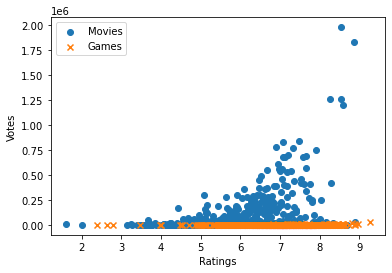

In [31]:
movies = franchise_grouped_df[franchise_grouped_df['content_type'] == 'movie']
games = franchise_grouped_df[franchise_grouped_df['content_type'] == 'game']

# Plot the movies as circles (o)
plt.scatter(movies['average_rating'], movies['average_votes'], marker='o', cmap='coolwarm', label='Movies')

# Plot the games as crosses (x)
plt.scatter(games['average_rating'], games['average_votes'], marker='x', cmap='coolwarm', label='Games')

# Add labels and legend
plt.xlabel('Ratings')
plt.ylabel('Votes')
plt.legend()

# Show the plot
plt.show()

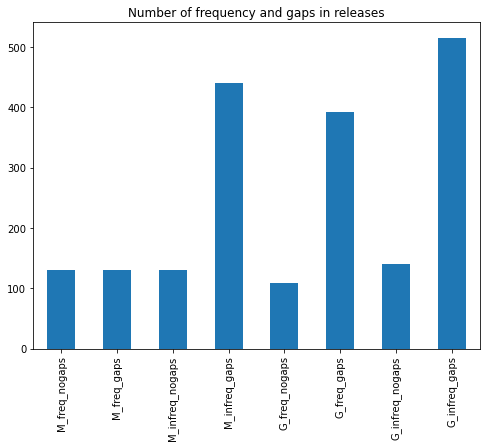

In [32]:
classification_counts = franchise_grouped_df.classification.value_counts().sort_index()
#plt.bar(classification_counts.index, classification_counts.values)
order = ['M_freq_nogaps', 'M_freq_gaps', 'M_infreq_nogaps', 'M_infreq_gaps',
         'G_freq_nogaps', 'G_freq_gaps', 'G_infreq_nogaps', 'G_infreq_gaps']

# sort the Series according to the order
sorted_counts = classification_counts.loc[order]

# plot the sorted Series as a bar chart
fig, ax = plt.subplots(figsize=(8, 6))
sorted_counts.plot.bar(ax=ax)
plt.title('Number of frequency and gaps in releases')
plt.show()

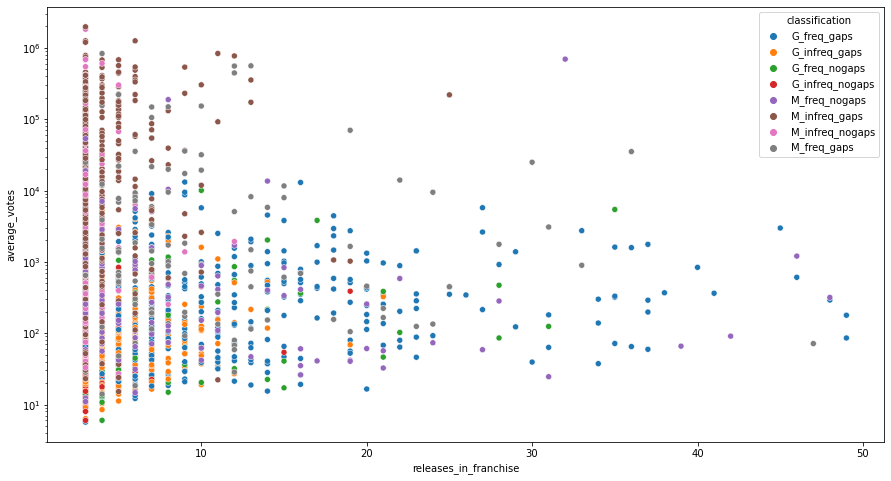

In [33]:
plt.figure(figsize = (15, 8))
sns.scatterplot(data=franchise_grouped_df[franchise_grouped_df['releases_in_franchise'] < 50], x='releases_in_franchise', y='average_votes', hue='classification')
plt.yscale('log')
plt.show()

In [34]:
franchise_grouped_df.describe()

,unique_years_of_releases,releases_in_franchise,average_rating,average_votes,average_releases_per_year,biggest_gap
count,1989.000000,1989.00000,1989.000000,1.989000e+03,1989.000000,1989.000000
mean,5.523881,7.38914,6.620431,2.563159e+04,1.235660,6.755656
std,4.697495,11.53354,1.029433,1.129798e+05,0.584693,6.376566
min,1.000000,3.00000,1.600000,5.666667e+00,1.000000,0.000000
25%,3.000000,3.00000,6.000000,6.277778e+01,1.000000,2.000000
50%,4.000000,4.00000,6.766667,2.902432e+02,1.000000,5.000000
75%,6.000000,7.00000,7.341667,2.502200e+03,1.250000,9.000000
max,43.000000,216.00000,9.275000,1.975593e+06,7.478261,47.000000


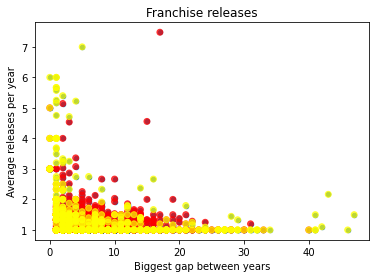

In [35]:
franchise_grouped_df.plot.scatter('biggest_gap', 'average_releases_per_year')
colors = {'game': 'red', 'movie': 'yellow'}

plt.scatter(franchise_grouped_df['biggest_gap'], franchise_grouped_df['average_releases_per_year'], c=franchise_grouped_df['content_type'].apply(lambda x: colors[x]), alpha = 0.7)
plt.xlabel('Biggest gap between years')
plt.ylabel('Average releases per year')
plt.title('Franchise releases')
plt.show()

In [36]:
# Group the data by franchise_id and get the maximum year_pos_in_franchise within each group
max_year_pos_in_franchise = df.groupby('franchise_id')['year_pos_in_franchise'].max()
franchise_count = df.groupby('franchise_id')['franchise_count'].max()


# Divide franchise_count by the maximum year_pos_in_franchise and save the results in a new DataFrame
results_df = max_year_pos_in_franchise.to_frame()

results_df

,year_pos_in_franchise
franchise_id,
3025-1,43.0
3025-10,14.0
3025-100,3.0
3025-1000,10.0
3025-1008,5.0
...,...
f99,7.0
f990,2.0
f993,3.0


In [37]:
#Combine total content to results_df:


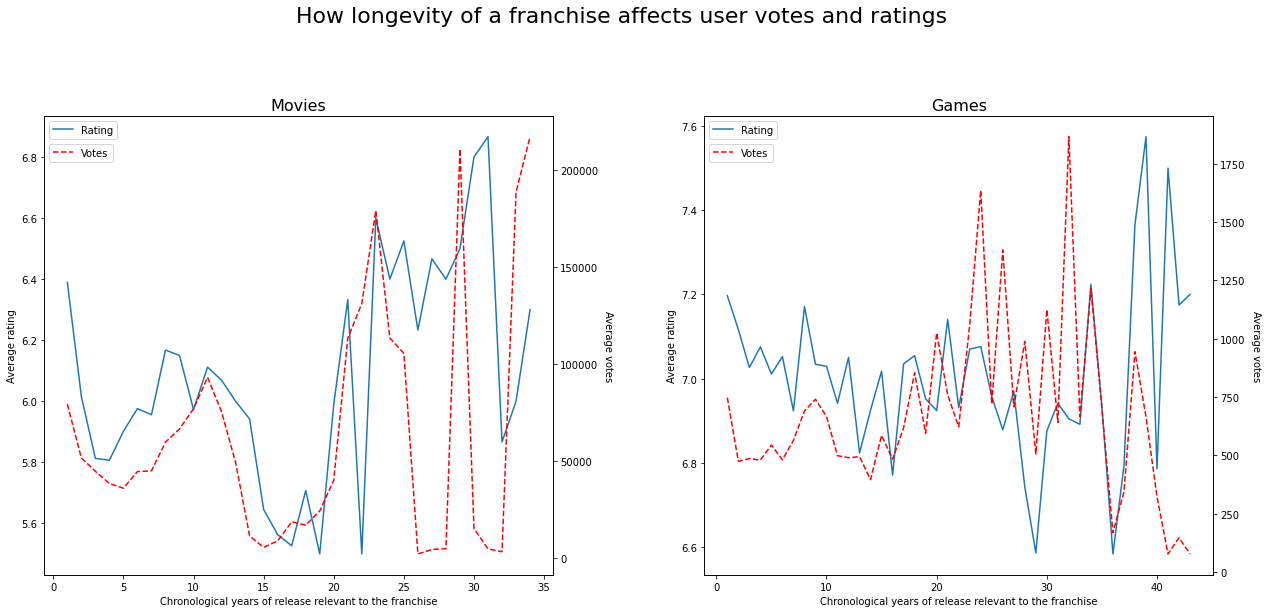

In [38]:
fig, ax1 = plt.subplots(1, 2, figsize=(20,10)) # create 1 row and 2 column of subplots
fig.tight_layout(pad=12.0)
avg_rating = df.groupby(['year_pos_in_franchise', 'type'])['rating'].mean()
avg_vote = df.groupby(['year_pos_in_franchise', 'type'])['votes'].mean()

# create a second y-axis for vote count
#fig, ax1[0] = plt.subplots()
ax2 = ax1[0].twinx()

# plot the average rating data
for t in ['movie']:
    ax1[0].plot(avg_rating.loc[:, t].index, avg_rating.loc[:, t].values, label = "Rating")

ax1[0].set_xlabel('Chronological years of release relevant to the franchise')
ax1[0].set_ylabel('Average rating')
ax1[0].set_title('Movies', fontsize = 16)

# plot the vote count data
for t in ['movie']:
    ax2.plot(avg_vote.loc[:,t].index, avg_vote.loc[:, t].values, linestyle='--', color = 'red', label = "Votes")

ax2.set_ylabel('Average votes', rotation = 270, labelpad = 15)
ax1[0].legend(loc = 'upper left')
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.95))

#fig, ax3 = plt.subplots()
ax4 = ax1[1].twinx()

# plot the average rating data
for t in ['game']:
    ax1[1].plot(avg_rating.loc[:, t].index, avg_rating.loc[:, t].values, label = "Rating")

ax1[1].set_xlabel('Chronological years of release relevant to the franchise')
ax1[1].set_ylabel('Average rating')
ax1[1].set_title('Games', fontsize = 16)

# plot the vote count data
for t in ['game']:
    ax4.plot(avg_vote.loc[:,t].index, avg_vote.loc[:, t].values, linestyle='--', label = "Votes", color = 'red')

ax4.set_ylabel('Average votes', rotation = 270, labelpad = 15)

# add legend
ax1[1].legend(loc = 'upper left')
ax4.legend(loc='upper left', bbox_to_anchor=(0, 0.95))
fig.suptitle('How longevity of a franchise affects user votes and ratings', fontsize = 22)
plt.show()

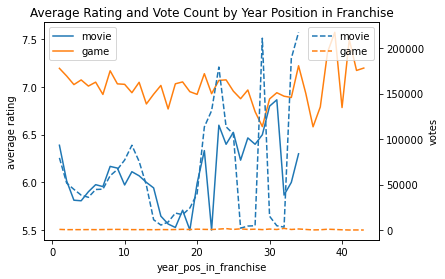

In [16]:
avg_rating = df.groupby(['year_pos_in_franchise', 'type'])['rating'].mean()
avg_vote = df.groupby(['year_pos_in_franchise', 'type'])['votes'].mean()

# create a second y-axis for vote count
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# plot the average rating data
for t in ['movie', 'game']:
    ax1.plot(avg_rating.loc[:, t].index, avg_rating.loc[:, t].values, label=t)

ax1.set_xlabel('year_pos_in_franchise')
ax1.set_ylabel('average rating')
ax1.set_title('Average Rating and Vote Count by Year Position in Franchise')

# plot the vote count data
for t in ['movie', 'game']:
    ax2.plot(avg_vote.loc[:,t].index, avg_vote.loc[:, t].values, linestyle='--', label=t)

ax2.set_ylabel('votes')

# add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

We want the number of unique tconsts as this ensures we're not counting the same release twice

In [17]:
df.tconst.nunique()

304620

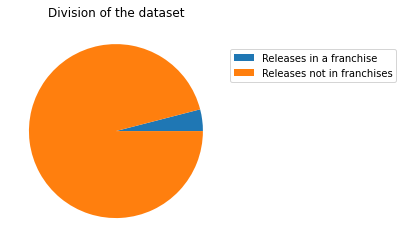

In [18]:
pie = plt.pie([df[~df["franchise_id"].isna()].tconst.nunique(), df[df["franchise_id"].isna()].tconst.nunique()])
plt.legend(pie[0], ["Releases in a franchise", "Releases not in franchises"], bbox_to_anchor=(1,0.9))
plt.title("Division of the dataset")
plt.show()

Another way to look at this would be considering movies and games as well

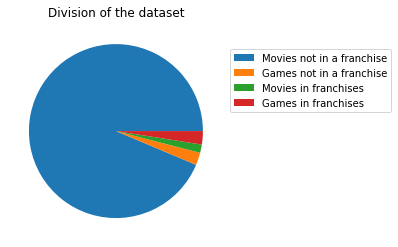

In [19]:
pie = plt.pie([df[(df["franchise_id"].isna()) & (df["type"]=="movie")].tconst.nunique(),
               df[(df["franchise_id"].isna()) & (df["type"]=="game")].tconst.nunique(),
               df[(~df["franchise_id"].isna()) & (df["type"]=="movie")].tconst.nunique(),
               df[(~df["franchise_id"].isna()) & (df["type"]=="game")].tconst.nunique()
              ])
plt.legend(pie[0], ["Movies not in a franchise", "Games not in a franchise", "Movies in franchises", "Games in franchises"], bbox_to_anchor=(1,0.9))
plt.title("Division of the dataset")
plt.show()

In [20]:
print("Average non-franchised movie votes: {}\nAverage franchised movie votes: {}\nAverage non-franchised game votes: {}\nAverage franchised game votes: {}\n".format(   
df[(df["franchise_id"].isna()) & (df["type"]=="movie")].tconst.nunique(),
df[(~df["franchise_id"].isna()) & (df["type"]=="movie")].tconst.nunique(),
df[(df["franchise_id"].isna()) & (df["type"]=="game")].tconst.nunique(),
df[(~df["franchise_id"].isna()) & (df["type"]=="game")].tconst.nunique()))

Average non-franchised movie votes: 285555
Average franchised movie votes: 4693
Average non-franchised game votes: 7102
Average franchised game votes: 7566



We can get the average vote and rating for each subsection of our data:

In [21]:
table_dict = {"Movies (No Franchise)": df[(df["franchise_id"].isna()) & (df["type"]=="movie")].votes.describe(), \
              "Movies (Franchise)": df[(~df["franchise_id"].isna()) & (df["type"]=="movie")].votes.describe(), \
              "Games (No Franchise)": df[(df["franchise_id"].isna()) & (df["type"]=="game")].votes.describe(), \
              "Games (Franchise)": df[(~df["franchise_id"].isna()) & (df["type"]=="game")].votes.describe()}

table = pd.concat(table_dict, axis=1)

print(table)

       Movies (No Franchise)  Movies (Franchise)  Games (No Franchise)  \
count           2.855570e+05        4.831000e+03           7122.000000   
mean            2.842332e+03        5.395310e+04            141.077506   
std             2.828221e+04        1.748784e+05            726.286436   
min             5.000000e+00        5.000000e+00              5.000000   
25%             1.800000e+01        1.400000e+02             11.000000   
50%             5.900000e+01        8.810000e+02             21.000000   
75%             2.930000e+02        1.018850e+04             55.750000   
max             2.727553e+06        2.700528e+06          24108.000000   

       Games (Franchise)  
count        9865.000000  
mean          587.798784  
std          2364.846129  
min             5.000000  
25%            23.000000  
50%            68.000000  
75%           271.000000  
max         69750.000000  


For the sake of easier analysis, we will divide our data into movies and games we will consider any movie with less than 59 votes as not being a popular enough movie to consider using in the analysis.

In [22]:
minimum_movie_count = 59

## Are more new small franchises appearing?

In [ ]:
df2 = df.sort_values('year').groupby('franchise_id').agg({
    'franchise_name' : 'first',
    'type': 'first',
    'rating': 'mean',
    'votes': 'mean',
    'franchise_count': 'first',
    'year': ['first', 'last']
})

In [ ]:
def split_year(row):
    row['first_year'] = int(row['year']['first'])
    row['last_year'] = int(row['year']['last'])
    return row

df2 = df2.apply(split_year, axis=1)
df2 = df2[['franchise_name', 'type', 'rating', 'votes', 'franchise_count', 'first_year', 'last_year']]
df2

We want to get the franchise length in years. As we want the years to be inclusive we need to add 1 to the total.

In [ ]:
df2["franchise_length_in_years"] = df2.apply(lambda row: row["last_year"] - row["first_year"] +1, axis = 1)

Remove the now-redundant multi-index

In [ ]:
df2.columns = df2.columns.get_level_values(0)

In [ ]:
df2.sample()

In [ ]:
df2.describe()

In [ ]:
ax = df2.plot.scatter('votes', 'rating')
ax.set_xscale("log")
plt.show()

In [ ]:
df_grouped = df.groupby('franchise_count').agg({'votes': 'mean', 'title': 'count'})

ax = df2.plot(x= 'franchise_count', y= df2['votes'].mean())
ax2 = ax.twinx()
df2.plot(x= 'franchise_count', y='rating', ax=ax2, color='r')
plt.show()

In [ ]:
df = pd.DataFrame({"date": ["2018-01-01", "2018-01-02", "2018-01-03", "2018-01-04"],
                   "column1": [555,525,532,585], 
                   "column2": [50,48,49,51]})

ax = df.plot(x="date", y="column1", legend=False)
ax2 = ax.twinx()
df.plot(x="date", y="column2", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

We have 5320 franchised movies, so let's get a sample of that number of non-franchised movies to compare them:

In [ ]:
df_movie_sample = df[df['type'] == 'movie'].sample(n=5320)

We can have a look at the stats for our sample and confirm that the sample is a fair representation of our original data

In [ ]:
df_movie_sample.votes.describe()